# <span style="color:#8B0000;font-family:Papirus">Coloración de vértices</span>

En la [introducción](05-grafos.ipynb) al tema de grafos, mencionamos el problema de colorear las regiones de un mapa de manera que regiones que comparten frontera tengan distintos colores. Asociamos al mapa un grafo y resolver el problema equivale a encontrar el mínimo $r$ tal que existe una manera de colorear los vértices del grafo para la cual vértices vecinos tienen distinto color. Ese mínimo $r$ se llama **número cromático** del grafo y se denota $\chi(G)$ si el grafo es $G$. Otro problema que puede modelarse con coloraciones de vértices es el de planificar reuniones para un conjunto de comités de manera que si dos comités tienen miembros en común, los horarios de las reuniones no coincidan. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

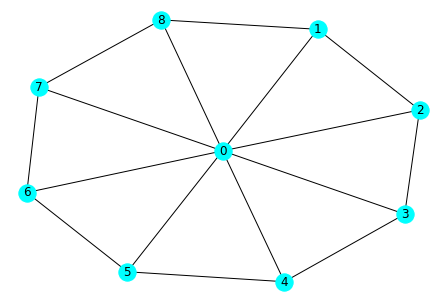

In [4]:
W = nx.wheel_graph(9)
nx.draw(W, with_labels=True, node_color='cyan')

Dados un grafo $G$ y un entero   positivo $r$, una **$r$-coloración** de los vértices de $G$ es una función $c\colon V(G)\to [r]$ tal que si $xy\in E(G)$ entonces $c(x)\not= c(y)$. Entonces el número cromático de $G$ es el mínimo $r$ tal que existe una $r$-coloración de los vértices de $G$.

¿Cómo coloreamos los vértices de la rueda en la figura con la cantidad mínima posible de colores?
1. Colorea $0$ con el color $x$.
2. Los demás vértices deben llevar un color distinto a $x$.
3. Como esos vértices están en un ciclo, podemos alternar con $2$ colores (el ciclo es par).

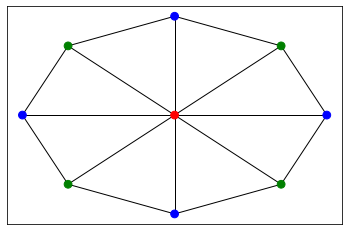

In [15]:
ubica_w = {0: (0, 0), 1: (1, 0), 2: (0.7, 0.7), 3: (0,1), 4: (-0.7, 0.7), 5: (-1,0), 6: (-0.7, -0.7), 7: (0, -1), 8: (0.7, -0.7)}
nx.draw_networkx_nodes(W, pos=ubica_w, nodelist=list(W.nodes()), node_color=['r', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g'], node_size=60)
nx.draw_networkx_edges(W, pos=ubica_w, edgelist=list(W.edges()), node_size=60)

Entonces el número cromático de la rueda $W_9$ es $3$. En general, $\chi(W_n) = 3$ si $n$ es impar, y $\chi(W_n) = 4$ si $n$ es par. En este ejercicio demostramos colateralmente:
> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Para cada entero positivo $k$, $\chi(C_{2k}) = 2$, $\chi(C_{2k - 1}) = 3$.

¿Cuál fue la estrategia que usamos para colorear los vértices de la rueda? En cada paso usamos el primer color que no había sido utilizado por un vecino del vértice en el paso en cuestión. Observa que la decisión fue considerar **la mejor opción posible para ese paso en particular** sin considerar los posibles inconvenientes que esa elección podría ocasionar luego. Un algoritmo basado en esta estrategia se conoce como **algoritmo voraz** (o glotón). Veamos otro ejemplo:

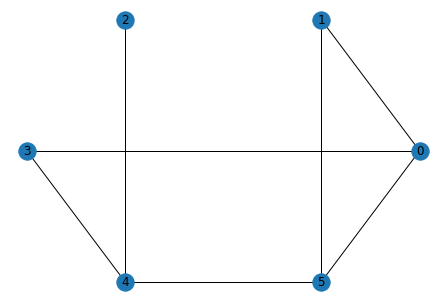

In [34]:
G = nx.Graph()
G.add_nodes_from([x for x in range(6)])
lados = [(0, 1), (0, 3), (0, 5), (1, 5), (2, 4), (3, 4), (4, 5)]
G.add_edges_from(lados)
nx.draw_circular(G, with_labels=True)

Dependiendo del orden que use para los vértices el algoritmo voraz puede dar un resultado óptimo o no. La biblioteca `networkx` de Python tiene su método para hallar coloraciones con el algoritmo voraz: `greedy_color`. De hecho, uno de los argumentos (`strategy`) es la estrategia a seguir para elegir el orden de los vértices a colorear (`largest_first`, `random_sequential`, `smallest_last`, `independent_set`, `connected_sequential_bfs`, `connected_sequential_dfs`, `saturation_largest_first`).

In [31]:
nx.greedy_color(W, strategy='smallest_last')

{0: 0, 1: 1, 2: 2, 3: 1, 4: 2, 5: 1, 6: 2, 7: 1, 8: 2}

Aunque el algoritmo voraz (usando algunas estrategias particulares) puede ser poco eficiente, resulta útil en la teoría. Por ejemplo, supongamos que $G$ es un grafo con $\Delta(G) = k$.
1. Ordena los vértices de $G$ así: $v_1$, $v_2$, $v_3$, $\dots$, $v_n$.
2. El conjunto de colores para los vecinos de $v_i$ tiene a lo sumo $k$ elementos.
3. Con un color más, se puede colorear $v_i$.
4. En cada paso, serán suficients $k + 1$ colores.
5. Podemos concluir que $\chi(G)\leq k + 1$.

¿Qué ganamos si además $G$ no es regular? Es decir, si algún vértice tiene **menos de** $k$ vecinos. Esta vez ordenamos los vértices de manera distina.
1. Llama $v_n$ a un vértice con grado menor que $k$.
2. Enumera los vecinos de $v_n$ así: $v_{n -1}$, $v_{n - 2}$, $v_{n - 3}$, $\dots$, $v_{n - r}$.
3. Enumera los vecinos de $v_{n - 1}$ (sin contar $v_n$).
4. Los enumerados en el paso anterior son a lo sumo $k - 1$.
5. Sigue de esta manera con los vecinos de $v_{n - 2}$ que no han sido contados.
6. En cada paso, el vértice tiene, a lo sumo $k - 1$ vecinos que le preceden en la lista.
7. ¿Qué necesitamos para que este proceso termine enumerando todos los vértices?
8. Se usarán todos los vértices de $G$ si $G$ es **conexo**. Así que agrega eso a las hipótesis.
9. Ahora aplica el mismo razonamiento de antes y obtendrás que $k$ colores son suficientes.

> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Sea $G$ un grafo con $\Delta(G) = k$. Entonces:
>  - $\chi(G)\leq k + 1$.
>  - Si $G$ es conexo y no regular, entonces $\chi(G)\leq k$.

¿Qué ocurre si $G$ es bipartito? Son suficientes $2$ colores: uno para cada conjunto de la bipartición. Más aún, si un grafo tiene número cromático $2$, entonces es bipartito.
> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Sea $G$ un grafo con al menos dos vértices. $G$ es bipartito si y sólo si $\chi(G) = 2$.

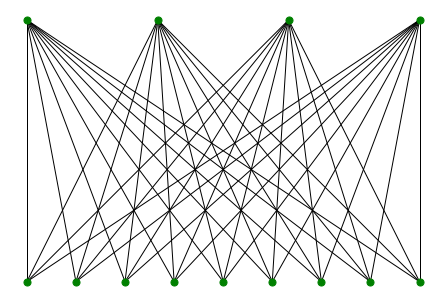

In [47]:
B = nx.complete_bipartite_graph(4, 9)
X, Y = nx.bipartite.sets(B)
ubica_B = nx.bipartite_layout(B, list(X), align='horizontal')
nx.draw(B, pos=ubica_B, node_color='green', node_size=50)

Ya vimos que un ciclo tiene número cromático $3$ si es impar. Por lo tanto un grafo bipartito no puede tener ciclos impares. ¿Será cierto el recíproco? Supongamos que $G$ no tiene ciclos impares (y tiene al menos dos vértices).
1. Sea $H$ una componente de $G$.
2. Elige un vértive $v_1\in V(H)$. Digamos que $v_1$ está en el **nivel 0**.
3. Enumera los vecinos de $v_1$ así: $v_2$, $v_3$, $\dots$, $v_r$. Digamos que están en el **nivel 1**.
4. Enumera los vecinos de los vértices del nivel 1 (sin contar $v_1$). Digamos que están en el **nivel 2**.
5. Así sucesivamente: en el nivel $k$ están los vecinos de vértices del nivel $k - 1$ que no están en los niveles anteriores.
6. Como $H$ es conexo este proceso termina enumerando todos los vértices de $H$.
7. Vértices en el nivel $k$ **no pueden** ser vecinos de vértices del mismo nivel:
   - Si $x$, $y$ son vecinos y ambos están en el nivel $k$, tienen vecinos $x_1$, $y_1$, respectivamente, en el nivel $k - 1$.
   - Si $x_1\not=y_1$, estos tienen vecinos $x_2$, $y_2$, respectivamente en el nivel $k - 2$.
   - Así sucesivamente. Eventualmente, habrá un vértice $z$ conectado a $x$ y a $y$ por caminos de la misma longitud.
   - Entonces, con el lado $xy$, se tiene un ciclo impar (que contiene a $z$). **Contradicción**.
8. Con los vértices enumerados de esa manera, el algortimo voraz le asigna un color a los vértices en los niveles pares y otro color a los vértices en los niveles impares.
9. $\chi(H) = 2$, así que $\chi(G) = 2$.

> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> $G$ es bipartito si y sólo si no tiene ciclos impares.